In [64]:
#import neccissary packages
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



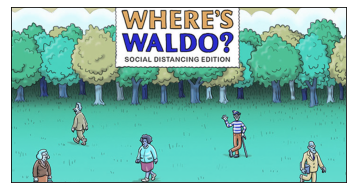

In [66]:
### SIMPLE WALDO FINDER ONLY RUN THIS PART FOR THAT OUTPUT###

import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('sd_test.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('sd_persptrans.png',0)
# saves the width and height of the template into 'w' and 'h'
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
# finding the values where it exceeds the threshold
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    #draw rectangle on places where it exceeds threshold
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,0), 4)
fig = plt.imshow(img_rgb)
fig.set_cmap('hot')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [61]:
# read in images

im1 = cv.imread('sd_test.png')
im2 = cv.imread('pp.png')
needle = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
haystack = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# use sift to calculate keypoints
sift = cv.SIFT_create()
needle_keypoints, needs = sift.detectAndCompute(needle,None)
haystack_keypoints, hays = sift.detectAndCompute(haystack,None)

#match keypoints in each image (from flann documentation)
index_params = dict(algorithm = 1, trees = 5)
search_params = dict(checks = 50)
match = cv.FlannBasedMatcher(index_params, search_params)

# N is the number of values being unpacked
N = 2
matches = match.knnMatch(needs,hays,k=N)

# store matches
good_matches = []
for a,b in matches:
    if a.distance < 0.7*b.distance:
        good_matches.append(a)


In [62]:
#check if enough keypoints are detected
# if enought keypoints are found we extract the locations of matched keypoints in both the images
if len(good_matches)>10:
    needle_pts = np.float32([ needle_keypoints[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    haystack_pts = np.float32([ haystack_keypoints[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
    M, mask = cv.findHomography(needle_pts, haystack_pts, cv.RANSAC,5.0)
    l,w = haystack.shape
    q = mask.ravel().tolist()
    polys = np.float32([ [0,0],[0,l-1],[w-1,l-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(polys,M)
    hatstack = cv.polylines(haystack,[np.int32(dst)],True,30,3, cv.LINE_AA)
    print( "found {} matches".format(len(good_matches),10))

else:
    print( "ERROR: Not enough matches found  only found {} matches, must be at least {} matches".format(len(good_matches),10))

found 188 matches


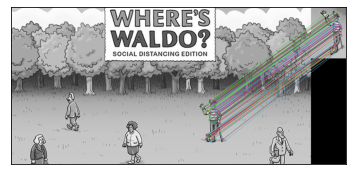

In [63]:
draw_params = dict(matchColor = None, singlePointColor = (0,255,0), matchesMask = q, flags = 2)


output = cv.drawMatches(needle,needle_keypoints,haystack,haystack_keypoints,good_matches,None,**draw_params)
fig = plt.imshow(output)
fig.set_cmap('hot')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)